# Степанов Никита 6308, лабораторная 1, 13 вариант

In [1]:
from math import *
def f(x):
    return abs(asin(x/2))

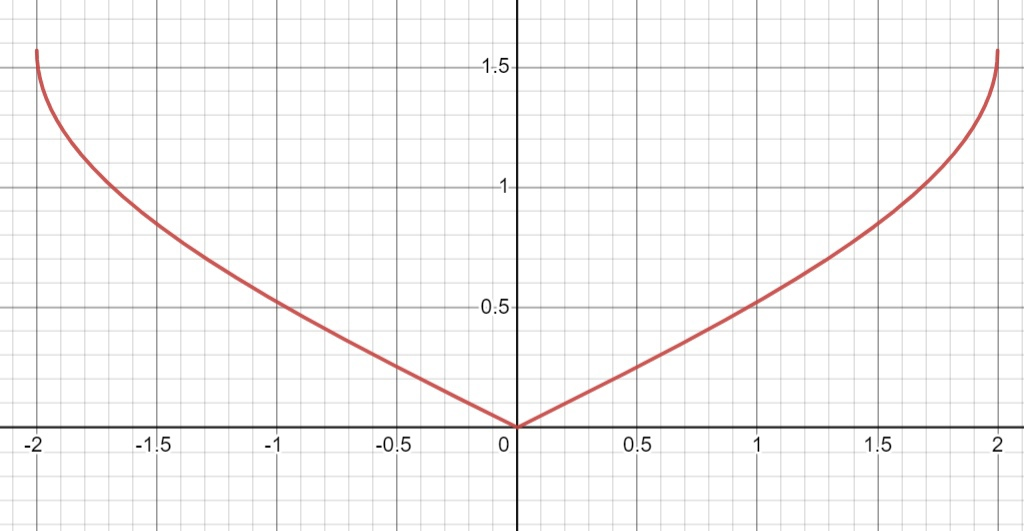

# Метод дихотомии

In [2]:
a = -1
b = 2

eps = 10**(-5)
d = 10**(-3)

it = 0

while abs(b-a) > 2 * d:
    it += 1
    mid = (a + b) / 2
    x1 = mid - eps / 2
    x2 = mid + eps / 2

    if f(x1) > f(x2):
        a = x1
    else:
        b = x2
            
print('x =', (a + b) / 2, '±', d / 2)
print('N =', 2 * it)

x = -0.00024247314453121544 ± 0.0005
N = 22


# Метод золотого сечения

In [31]:
a = -1
b = 2

d = 10**(-3)

it = 2

F = ((5**(0.5) + 1) / 2) # = 1,61

x = a + (b - a) / F
lx = a + b - x

Fx = f(x)
Flx = f(lx)

while abs(b-a) > 2 * d:
    it += 1
    if Flx > Fx:
        a = lx
        lx = x 
        Flx = Fx
    else:
        b = x    
        
    x = a + b - lx 
    Fx = f(x)
    
    if lx > x:
        lx, x = x, lx
        Flx, Fx = Fx, Flx
            
print('x =', lx, '±', (b - a) / 2)
print('N =', it)

x = 6.610696148512396e-05 ± 0.0006796557807063897
N = 18


# Метод Фиббаначи

In [4]:
def fib(n):
    n1 = n2 = 1
    for i in range(n-2):
        n2, n1 = n1, n1 + n2
    return n1
#print(fib(6))

In [33]:
def methFib(a, b, n):
    it = 0
    x1 = a + (fib(n-2) / fib(n)) * (b - a)
    x2 = a + (fib(n-1) / fib(n)) * (b - a)
    leftF = f(x1)
    rightF = f(x2)
    
    while it < (n - 2):
        if leftF > rightF:
            a = x1 
            x1 = x2
            x2 = a + b - x1 # в силу симметричности
            leftF = rightF
            rightF = f(x2)
        else:
            b = x2
            x2 = x1
            x1 = a + b - x2
            rightF = leftF
            leftF = f(x1)
        #print(b-a)
        it += 1
        
    return (a + b) / 2, (b - a) / 2, it + 2

In [34]:
a = -1
b = 2

n = 18

x, eps, it = methFib(a, b, n)

print('x =', x, '±', eps)
print('N =', it)

x = 0.00019349845201555027 ± 0.0005804953560466508
N = 18
